# Star Wars Survey

This project analyzes data collected by FiveThirtyEight prior to the release of *Star Wars: The Force Awakens* in 2015. To answer some questions they had about Star Wars fans, FiveThirtyEight surveyed 835 individuals using SurveyMonkey. The raw dataset can be found on their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey). We will perform some data cleaning on the dataset and then attempt to determine how different groups rank the first six *Star Wars* films.

In [1]:
import pandas as pd
import numpy as np

In [2]:
star_wars = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv', 
                        encoding='ISO-8859-1')

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

In [4]:
star_wars.shape

(1187, 38)

In [5]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

First, let's remove any rows that do not have a valid 'RespondentID'. It turns out that there is only one such row.

In [6]:
star_wars.isnull().sum()

RespondentID                                                                                                                                       1
Have you seen any of the 6 films in the Star Wars franchise?                                                                                       0
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            350
Which of the following Star Wars films have you seen? Please select all that apply.                                                              513
Unnamed: 4                                                                                                                                       615
Unnamed: 5                                                                                                                                       636
Unnamed: 6                                                                                                

In [7]:
star_wars = star_wars.loc[pd.notnull(star_wars['RespondentID'])]

In [8]:
star_wars.shape

(1186, 38)

In [9]:
star_wars.isnull().sum()

RespondentID                                                                                                                                       0
Have you seen any of the 6 films in the Star Wars franchise?                                                                                       0
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            350
Which of the following Star Wars films have you seen? Please select all that apply.                                                              513
Unnamed: 4                                                                                                                                       615
Unnamed: 5                                                                                                                                       636
Unnamed: 6                                                                                                

The dataset contains several columns which use string values ("Yes", "No") to represent boolean variables. We will update the values in these columns to booleans to make them easier to work with.

In [10]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [11]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [12]:
yes_no = {"Yes":True, "No":False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [13]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [14]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

There are several columns in the data set whose values were created using checkboxes in the survey. Some of these column names are excessively long and/or ambiguous. We will update the column names to be clearer. We will also update the values in these columns to use booleans rather than strings.

In [15]:
star_wars.rename(columns = {"Which of the following Star Wars films have you seen? Please select all that apply.":"seen_1", 
                            "Unnamed: 4":"seen_2", "Unnamed: 5":"seen_3", "Unnamed: 6":"seen_4", "Unnamed: 7":"seen_5", 
                            "Unnamed: 8":"seen_6"},
                            inplace=True)

In [16]:
star_wars['seen_6'].value_counts(dropna=False)

Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: seen_6, dtype: int64

In [17]:
movie_columns = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']

for col in movie_columns:
    star_wars.loc[star_wars[col].notnull(), col] = True
    star_wars.loc[star_wars[col].isnull(), col] = False

In [18]:
star_wars['seen_6'].value_counts(dropna=False)

True     738
False    448
Name: seen_6, dtype: int64

Columns 9-15 represent the rankings each survey respondent provided for the movies (1 = favorite; 6 = least favorite). These values are represented as strings in our dataset; we will convert them to floats to make them easier to work with. We will also rename the column headings to make them more clear.

In [19]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [20]:
star_wars.rename(columns = {"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking_1", 
                            "Unnamed: 10":"ranking_2", "Unnamed: 11":"ranking_3", "Unnamed: 12":"ranking_4", 
                            "Unnamed: 13":"ranking_5", "Unnamed: 14":"ranking_6"},
                             inplace=True)

We are ready to analyze our data! First, let's look at the average rank of each movie and the number of survey repsondents who had seen each movie for the data set as a whole.

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
rank_means = star_wars.iloc[:, 9:15].mean()

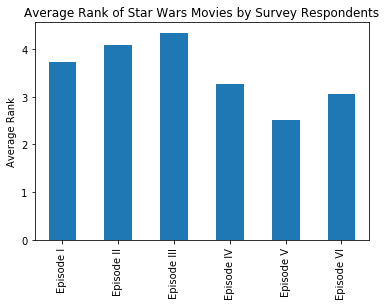

In [23]:
movie_names = ('Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI')

rank_means.plot(kind='bar')
plt.xticks(np.arange(6), movie_names)
plt.ylabel("Average Rank")
plt.title("Average Rank of Star Wars Movies by Survey Respondents")
plt.show()

We can see in the bar chart above that Episode V was the highest-ranked movie when considering all survey respondents. It was followed by Episode VI and Episode IV. The lowest-ranked movie was Episode III.

In [ ]:
seen_counts = star_wars.iloc[:, 3:9].sum()

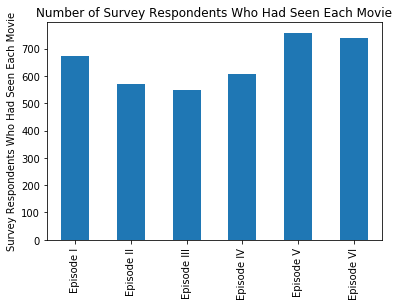

In [ ]:
seen_counts.plot(kind='bar')
plt.xticks(np.arange(6), movie_names)
plt.ylabel("Survey Respondents Who Had Seen Each Movie")
plt.title("Number of Survey Respondents Who Had Seen Each Movie")
plt.show()

We can see in the above bar chart that Episode V was the most-viewed movie among the survey respondents. One interesting observation is that the movies which had been seen by the most survey participants tend to be rated higher than those which fewer people had seen. This makes sense - people likely would not rate a movie they had not seen higher than a movie which they had seen.

Now, let's split our data set into two groups - those who identified themselves as Star Wars fans, as those who did not. We will again look at the average ranking of the movies and the number of survey respondents who had seen each movie.

In [ ]:
swfans_ranking = star_wars.iloc[:, [2, 9, 10, 11, 12, 13, 14]].groupby(by='Do you consider yourself to be a fan of the Star Wars film franchise?').agg(np.mean).transpose()

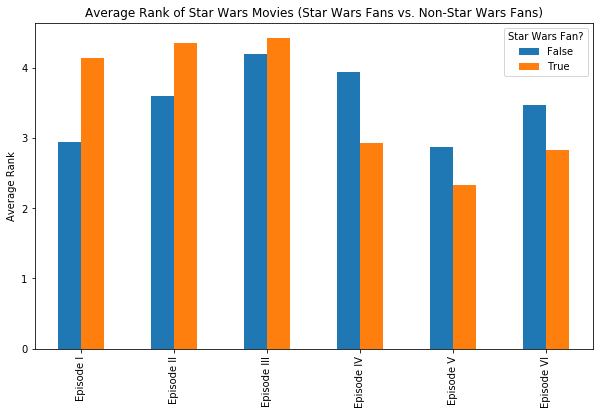

In [ ]:
swfans_ranking.plot(kind='bar', figsize=(10,6))
plt.xticks(np.arange(6), movie_names)
plt.ylabel("Average Rank")
plt.title("Average Rank of Star Wars Movies (Star Wars Fans vs. Non-Star Wars Fans)")
plt.legend(title="Star Wars Fan?")
plt.show()

As shown above, Star Wars fans rated the original Star Wars trilogy (Episodes IV-VI) higher than the non-Star Wars fans did. Conversely, the non-Star Wars fans rated the prequel trilogy (Episodes I-III) higher than the Star Wars fans did. This makes sense - many Star Wars fans are disdainful towards the prequel films. We can assume from the results of this survey, that casual viewers of the Star Wars films (non-fans) are not as prejudiced towards the prequel films. It is noteable, however, that both groups rated Episode V as the best film in the series.

In [ ]:
swfans_seencounts = star_wars.iloc[:, 2:9].groupby(by='Do you consider yourself to be a fan of the Star Wars film franchise?').agg(np.sum).transpose()

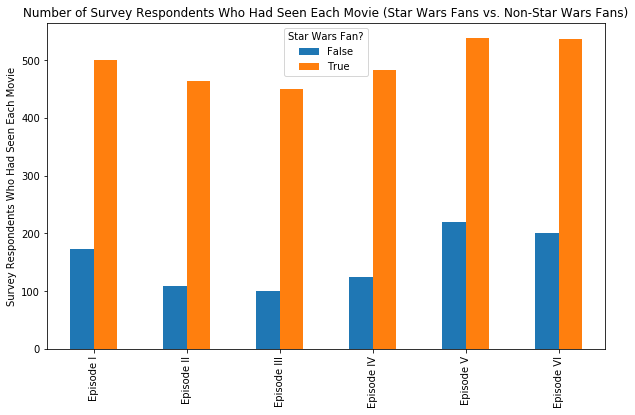

In [ ]:
swfans_seencounts.plot(kind='bar', figsize=(10,6))
plt.xticks(np.arange(6), movie_names)
plt.ylabel("Survey Respondents Who Had Seen Each Movie")
plt.title("Number of Survey Respondents Who Had Seen Each Movie (Star Wars Fans vs. Non-Star Wars Fans)")
plt.legend(title="Star Wars Fan?")
plt.show()

As we would expect, the Star Wars fans who took the survey were much more likely to have seen all six movies compared to the non-Star Wars fans. Once again, the average ranking of each film seems to correlate with the number of survey respondents who had seen it.

Next, let's divide the survey respondents on whether they self-identified as Star *TREK* fans or not. While there is definitely an overlap in the fanbases of the Star Wars and Star Trek franchises, there are many individuals who prefer one over the other. It will be interesting to see if Star Trek fans have different opinions of the Star Wars movies than Star Wars fans do.

In [ ]:
stfans_ranking = star_wars.iloc[:, [32, 9, 10, 11, 12, 13, 14]].groupby(by='Do you consider yourself to be a fan of the Star Trek franchise?').agg(np.mean).transpose()

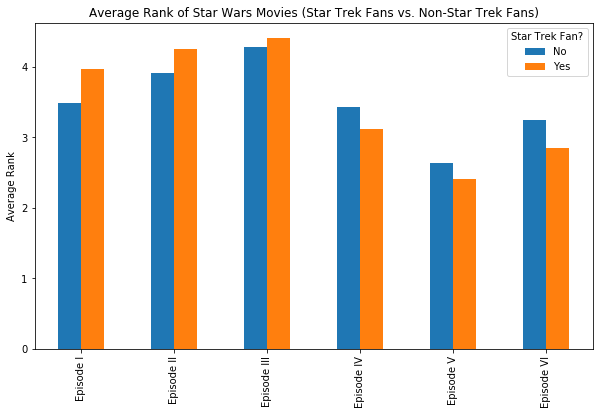

In [ ]:
stfans_ranking.plot(kind='bar', figsize=(10,6))
plt.xticks(np.arange(6), movie_names)
plt.ylabel("Average Rank")
plt.title("Average Rank of Star Wars Movies (Star Trek Fans vs. Non-Star Trek Fans)")
plt.legend(title="Star Trek Fan?")
plt.show()

As seen above, Star Trek fans were not significantly differentiated from non-Star Trek fans in their rankings of the Star Wars movies. However, they did tend to rate the original trilogy higher than non-Star Trek fans, while rating the prequel trilogy lower than non-Star Trek fans.

In [ ]:
stfans_seencounts = star_wars.iloc[:, [32, 3, 4, 5, 6, 7, 8]].groupby(by='Do you consider yourself to be a fan of the Star Trek franchise?').agg(np.sum).transpose()

In [ ]:
stfans_seencounts.plot(kind='bar', figsize=(10,6))
plt.xticks(np.arange(6), movie_names)
plt.ylabel("Survey Respondents Who Had Seen Each Movie")
plt.title("Number of Survey Respondents Who Had Seen Each Movie (Star Trek Fans vs. Non-Star Trek Fans)")
plt.legend(title="Star Trek Fan?")
plt.show()

As shown in the bar graph above, Star Trek fans were more likely to have seen all six Star Wars movies. This indicates that there is a significant overlap between the fanbases.